In [44]:
import numpy
import os
import matplotlib.pyplot as plt

In [134]:
folder_name='output_AllQus'
def extract_companys_problems(company=None):
    tag_ratio=dict()
    difficulty_ratio=dict()
    all_questions_folder='output_AllQus'
    folders_in_all_questions_folder=os.listdir(folder_name)
    file_name='leetcode_links_company_'+company+'.txt'
    file=open(file_name,'r')
    for line in file:
        problem_name=line[30:-2]
        for term in folders_in_all_questions_folder:
            if problem_name in term:
                
                description_problem=open(all_questions_folder+'/'+term+'/README.md','r',encoding='utf-8')
                
                for line2 in description_problem:
                    if '**Tags:**' in line2:
                        tag_list=line2[10:-1].split(', ')
                        for tag in tag_list:
                            if tag in tag_ratio:
                                tag_ratio[tag]=tag_ratio[tag]+1
                            else:
                                tag_ratio[tag]=1
                    if '**Difficulty:**' in line2:
                        difficulty=line2[16:-1]
                        if difficulty in difficulty_ratio:
                            difficulty_ratio[difficulty]=difficulty_ratio[difficulty]+1
                        else:
                            difficulty_ratio[difficulty]=1
                description_problem.close()
                break
    file.close()
    return tag_ratio,difficulty_ratio

In [138]:
company_tag,company_difficulty=extract_companys_problems('amazon')
print(company_difficulty)

{'Easy': 95, 'Hard': 65, 'Medium': 180}


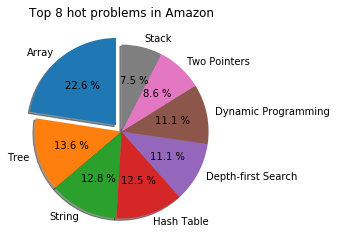

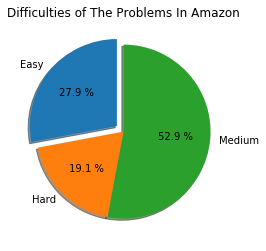

In [141]:
top_labels=[]
top_values=[]
top_num=8
company_sorted=sorted(company_tag.items(),key=lambda x:x[1],reverse=True)
for term in company_sorted[0:top_num]:
    top_labels.append(term[0])
    top_values.append(term[1])
###### Plot the figure of tags' ratio
explode=[0]*top_num
explode[0]=0.1
plt.axes(aspect=1)  # set this , Figure is round, otherwise it is an ellipse
#autopct ，show percet
plt.pie(x=top_values, labels=top_labels, explode=explode,autopct='%3.1f %%',
        shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6
        )
plt.title('Top {} hot problems in Amazon'.format(top_num))
plt.show()

####### Plot the figure of difficulties' ratio
explode_diff=[0]*3
explode_diff[0]=0.1
plt.axes(aspect=1)  
plt.pie(x=company_difficulty.values(), labels=company_difficulty.keys(), explode=explode_diff,autopct='%3.1f %%',
        shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6
        )
plt.title('Difficulties of The Problems In Amazon')
plt.show()